In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Example

In [2]:
# Downloading NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample text
text = "This is a sample sentence, demonstrating the removal of stopwords and punctuation!"

# Tokenization
tokens = word_tokenize(text)

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove punctuation
tokens = [word for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
additional_stops = ['arafed', 'araffed', 'araffe', 'woman']
for word in additional_stops:
    stop_words.add(word)
    
tokens = [word for word in tokens if not word in stop_words]

# Rejoin tokens into a string
cleaned_text = ' '.join(tokens)

print(cleaned_text)

sample sentence demonstrating removal stopwords punctuation


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import data

In [3]:
import pandas as pd
import numpy as np
df = pd.read_excel('../data/auto_gen_captions.xlsx')
df.head()

,Long,Auto_caption
0,2013-10-08_12-40-36_UTC.jpg,a close up of a woman on a magazine cover with...
1,2014-03-21_10-14-52_UTC.jpg,there is a woman in a sheery dress posing for ...
2,2014-04-12_09-13-03_UTC.jpg,three women in dresses posing for a fashion ph...
3,2015-06-01_07-45-08_UTC.jpg,there is a woman with tattoos on her arms and ...
4,2015-07-06_10-38-30_UTC.jpg,araffed woman with tattoos and a white dress p...


## Clean data

In [5]:
clean_text = []
for row in df['Auto_caption']:
    text = row
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    additional_stops = ['arafed', 'araffed', 'araffe', 'woman']
    for word in additional_stops:
        stop_words.add(word)
    tokens = [word for word in tokens if not word in stop_words]
    
    # Rejoin tokens into a string
    cleaned_text = ' '.join(tokens)
    clean_text.append(cleaned_text)

In [6]:
df['clean_text'] = clean_text

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
# Assuming df is your DataFrame and 'text_column' is the column with text
text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = None,
                      min_font_size = 10).generate(text)

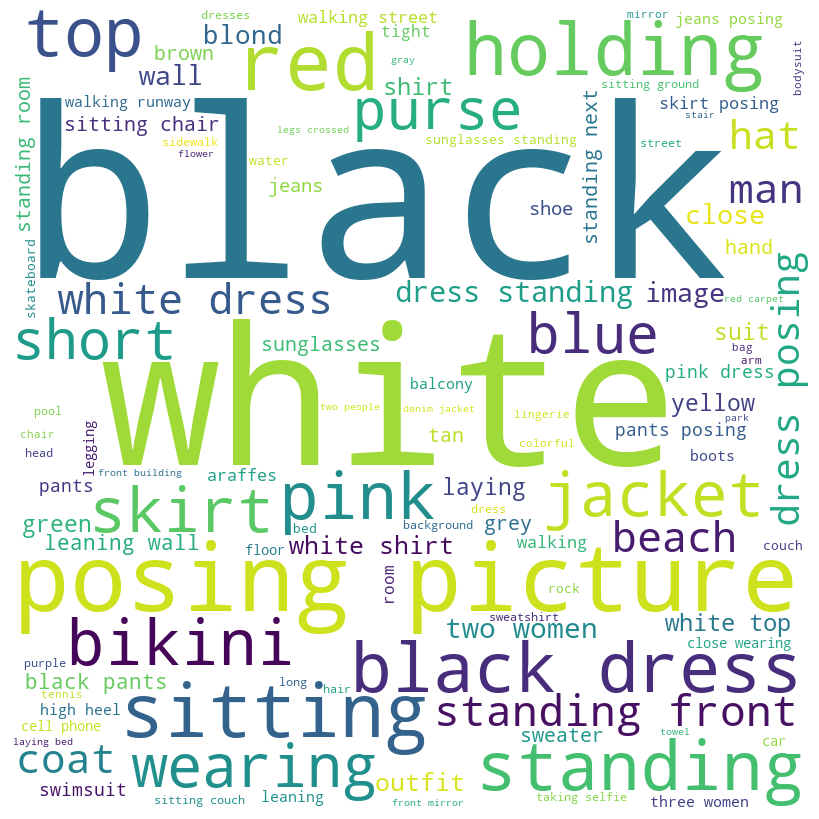

In [9]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


black 250
white 190
dress 172
standing 163
posing 143
picture 114
sitting 109
top 89
red 78
pink 65


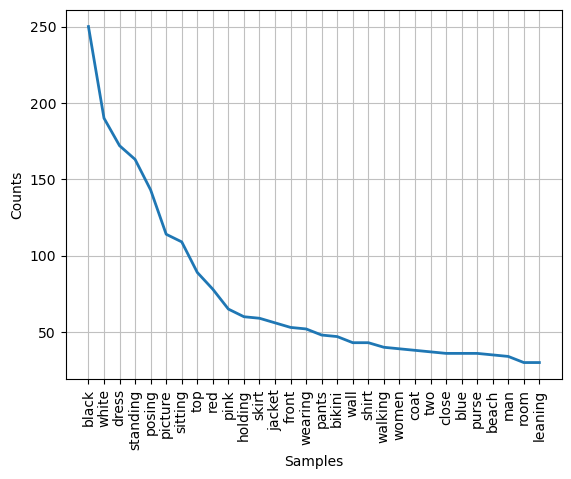

In [10]:
from nltk.probability import FreqDist


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample text
text = ' '.join(df['clean_text'])

# Tokenization
tokens = word_tokenize(text)

# Optional: Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
additional_stops = ['arafed', 'araffed', 'araffe', 'woman']
for word in additional_stops:
    stop_words.add(word)
tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Frequency distribution
freq_dist = FreqDist(tokens)

# Display most common words
for word, frequency in freq_dist.most_common(10):
    print(word, frequency)

# Plot frequency distribution
freq_dist.plot(30, cumulative=False)
plt.show()

### Processing POS

In [ ]:
%run ../labs/cleaning_mod.py

### Save

In [11]:
df.head()

,Long,Auto_caption,clean_text
0,2013-10-08_12-40-36_UTC.jpg,a close up of a woman on a magazine cover with...,close magazine cover cross
1,2014-03-21_10-14-52_UTC.jpg,there is a woman in a sheery dress posing for ...,sheery dress posing picture
2,2014-04-12_09-13-03_UTC.jpg,three women in dresses posing for a fashion ph...,three women dresses posing fashion photo jewelry
3,2015-06-01_07-45-08_UTC.jpg,there is a woman with tattoos on her arms and ...,tattoos arms chest
4,2015-07-06_10-38-30_UTC.jpg,araffed woman with tattoos and a white dress p...,tattoos white dress posing picture


In [13]:
df.to_excel('../data/autogenerated_clean.xlsx', index = False)